In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train_drop = train.drop(['casual','registered', 'count'], axis=1)
train_drop.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0


In [5]:
comb = pd.concat([train_drop, test])
comb.shape

(17379, 9)

In [6]:
comb['datetime'] = pd.to_datetime(comb.datetime, format='%Y-%m-%d %H:%M:%S')

In [7]:
comb['hour'] = comb.datetime.dt.hour
comb.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,4


In [8]:
comb.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,11.546752
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,6.914405
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,12.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,23.000000


In [9]:
comb.std()

season         1.106918
holiday        0.167165
workingday     0.465431
weather        0.639357
temp           7.894801
atemp          8.592511
humidity      19.292983
windspeed      8.196795
hour           6.914405
dtype: float64

In [10]:
r, c = comb.shape

zero_list = []
for i in range(1, c):
    if(comb.iloc[:,i].std()==0):
        zero_list.append(comb.columns[i])

feature_cols = [col for col in comb.columns if col not in zero_list]
feature_cols

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'hour']

In [11]:
comb.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
season,1.000000,-0.009585,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,-0.006117
holiday,-0.009585,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.000479
workingday,0.013743,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.002285
weather,-0.014524,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.020203
temp,0.312025,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.137603
atemp,0.319380,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.133750
humidity,0.150625,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.276498
windspeed,-0.149773,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.137252
hour,-0.006117,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,1.000000


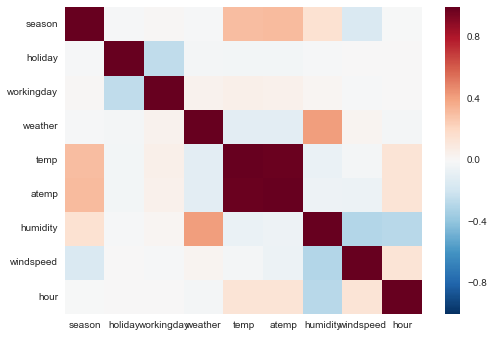

In [12]:
#plt.matshow(comb.corr())
import seaborn as sns
corr = comb.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [13]:
# As we can see headmap, 'temp' and 'atemp' are highly correlated. 'atemp' should be removed
comb = comb.drop(['datetime', 'atemp'], 1)
comb.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,hour
0,1,0,0,1,9.84,81,0.0,0
1,1,0,0,1,9.02,80,0.0,1
2,1,0,0,1,9.02,80,0.0,2
3,1,0,0,1,9.84,75,0.0,3
4,1,0,0,1,9.84,75,0.0,4


In [14]:
x_train = comb.iloc[:train.shape[0], :].values
x_test = comb.iloc[train.shape[0]:, :].values
y_train = train.loc[:,'count'].values
(x_train.shape, x_test.shape, y_train.shape)

((10886L, 8L), (6493L, 8L), (10886L,))

In [31]:
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn import ensemble

kf = KFold(len(x_train), n_folds=10, shuffle=True, random_state=4)

# 1-st try, Gradient Boosting regression with gridsearch
clf = ensemble.GradientBoostingRegressor()
parameter_grid = {'n_estimators': [100, 150, 200, 300],
                  "max_depth": [3, 5, None],
                  'min_samples_split':[2, 3],
                  'max_features': ['auto', 'sqrt', 'log2']}

In [32]:
grid_search = GridSearchCV(clf, param_grid=parameter_grid)

In [ ]:
grid_search.fit(x_train, y_train)

In [17]:
for i, j in kf:
    grid_search.fit(x_train[i], y_train[i])
    print(grid_search.score(x_train[j], y_train[j]))

0.856333721867
0.811832504324
0.838292669334
0.848222968663
0.839293053663
0.841199327881
0.834473844794
0.816470540559
0.799946260435
0.842883922923


In [19]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=5, max_features='log2', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [16]:
#dir()

In [22]:
clf_grid = grid_search.best_estimator_
clf_grid.score(x_train, y_train)

0.8584964644996812

In [28]:
y_test = np.ceil(np.abs(clf_grid.predict(x_test)))

In [30]:
result = test[['datetime']]
result.loc[:,'count'] = y_test
result.to_csv('Submission_GradientBoosting.csv', index=False)

In [ ]:
for i, j in kf: